In [1]:
import pandas as pd

df = pd.read_csv('fact_covid.csv')
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')
df = df.sort_values(by="Date")
print(len(df.index))
print(df.head())
print(df.tail())

1038917
              Date     county       State   FIPS  cases  deaths
1037394 2020-01-21  Snohomish  Washington  53061      1     0.0
283623  2020-01-22  Snohomish  Washington  53061      1     0.0
283624  2020-01-23  Snohomish  Washington  53061      1     0.0
283626  2020-01-24  Snohomish  Washington  53061      1     0.0
283625  2020-01-24       Cook    Illinois  17031      1     0.0
             Date     county        State   FIPS  cases  deaths
280826 2021-02-20   Itawamba  Mississippi  28057   2879    71.0
280825 2021-02-20  Issaquena  Mississippi  28055    167     6.0
280824 2021-02-20  Humphreys  Mississippi  28053    909    26.0
280822 2021-02-20      Hinds  Mississippi  28049  18528   382.0
286556 2021-02-20    Kossuth         Iowa  19109   1941    54.0


In [2]:
df.columns
#df.drop(columns=['index'], inplace=True)

Index(['Date', 'county', 'State', 'FIPS', 'cases', 'deaths'], dtype='object')

In [3]:
start_date = '2020-01-21'
end_date = '2021-02-20'

# Filter rows within the date range
dfs = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

In [60]:
import numpy as np

df.reset_index(inplace=True)
date=dfs.groupby(pd.Grouper(key='Date',freq='1D')).agg({'cases':['max'],'deaths':['max']})
date.columns=['total_cases','total_deaths']
date['total_cases']=np.cumsum(date['total_cases'])
date['total_deaths']=np.cumsum(date['total_deaths'])
date

date.tail(10)


total_cases  total_deaths
Date                                 
2021-02-11    104365598     2068245.0
2021-02-12    105527892     2087034.0
2021-02-13    106693186     2106018.0
2021-02-14    107860260     2125084.0
2021-02-15    109029164     2144179.0
2021-02-16    110199264     2163394.0
2021-02-17    111371485     2182762.0
2021-02-18    112546382     2202276.0
2021-02-19    113723722     2221938.0
2021-02-20    114903355     2241731.0

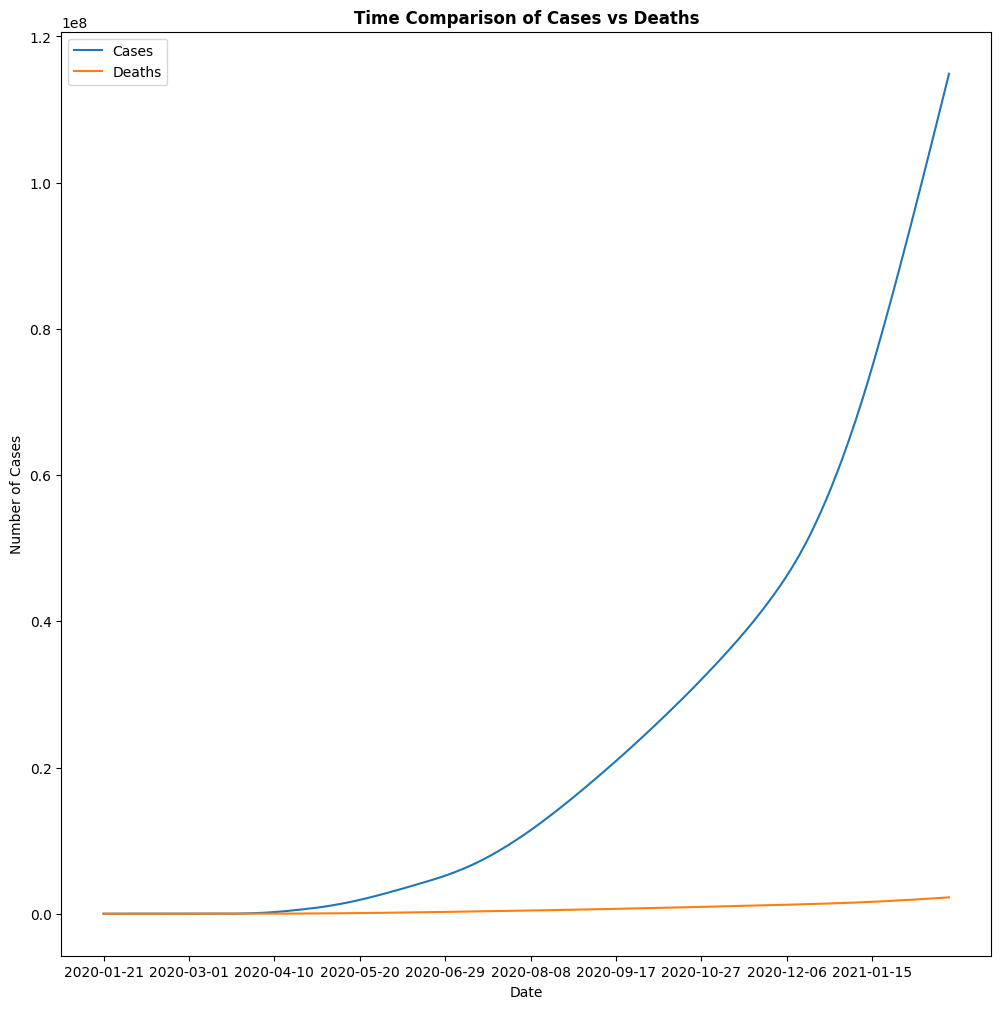

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,12))

plt.plot(date.index, date['total_cases'],label='Cases')
plt.plot(date.index, date['total_deaths'],label='Deaths')

plt.xticks(np.array(pd.date_range('2020-01-21','2021-02-20',freq='40D')))
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Time Comparison of Cases vs Deaths',fontweight='bold')
plt.legend()
ax=plt.gca()


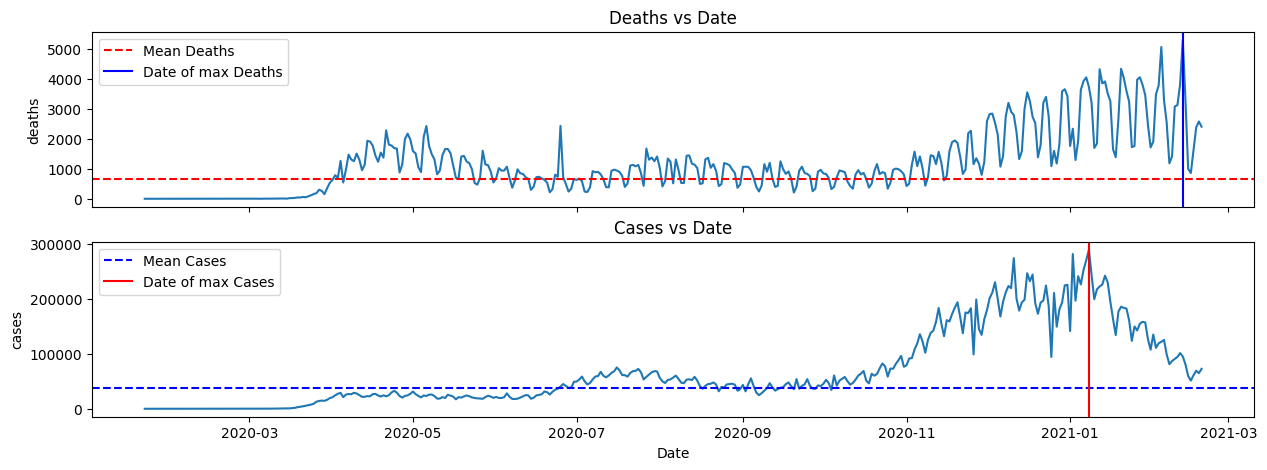

In [63]:
df_all = df
df_all = df_all.groupby(['Date'])[['deaths','cases']].sum()
df_alll = df_all

df_alll = df_alll.diff(axis=0)

df_alll1 = df_alll.reset_index()


mean1 = df_alll1['deaths'].mean()
mean2 = df_alll1['cases'].mean()

a = df_alll.idxmax()


titlea = 'Deaths vs Date'
titleb = 'Cases vs Date'

fig, axes = plt.subplots(2,1 , figsize=(15, 5), sharex=True)

sns.lineplot(ax=axes[0], x = 'Date', y= 'deaths', data = df_alll1[:-1])
axes[0].set_title(titlea)
sns.lineplot(ax=axes[1], x = 'Date', y= 'cases', data = df_alll1[:-1])
axes[1].set_title(titleb)

axes[0].axhline(mean1, color='r', linestyle='--', label = 'Mean Deaths')
axes[1].axhline(mean2, color='b', linestyle='--', label = 'Mean Cases')

axes[0].axvline(a[0], color='b', linestyle='-', label = 'Date of max Deaths')
axes[1].axvline(a[1], color='r', linestyle='-', label = 'Date of max Cases')


axes[0].legend()
axes[1].legend()

plt.show()

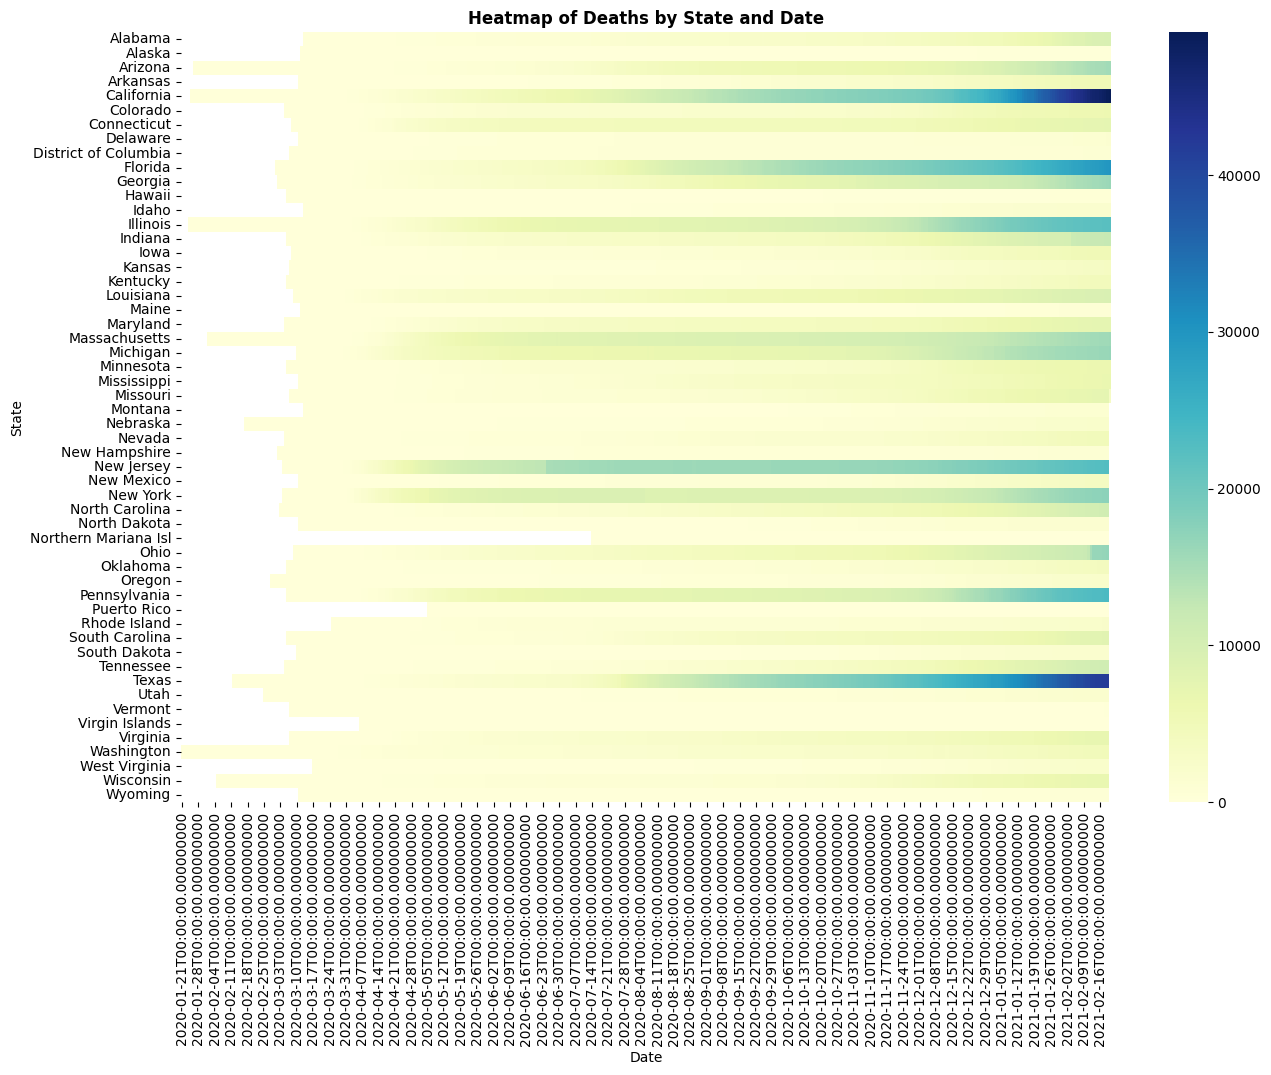

In [16]:
heatmap_data = df.pivot_table(index='State', columns='Date', values='deaths', aggfunc='sum')
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Heatmap of Deaths by State and Date',fontweight='bold')
plt.show()

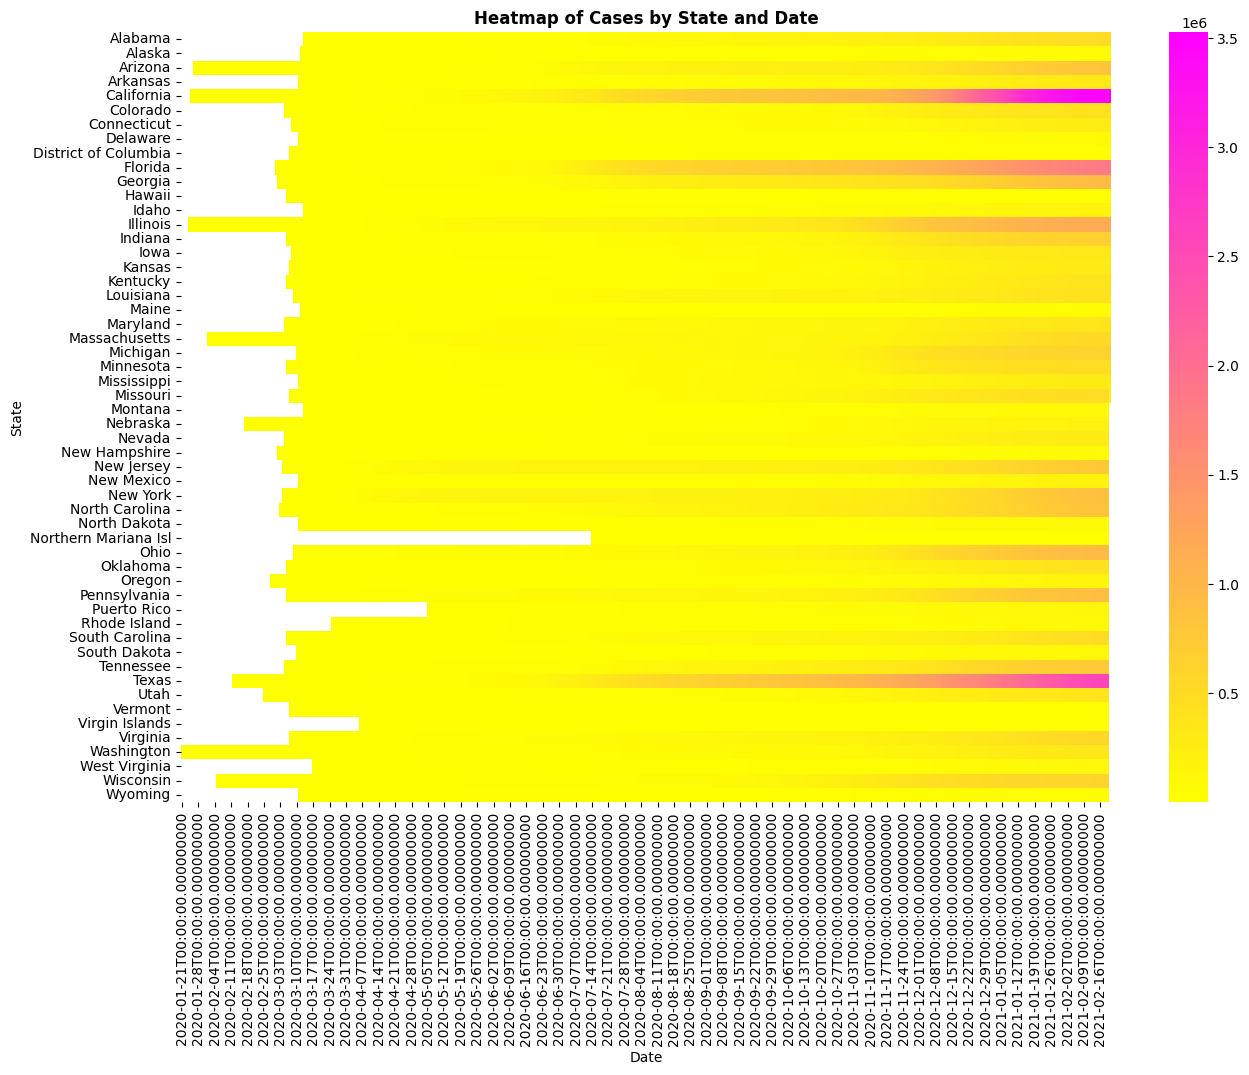

In [17]:
heatmap_data = df.pivot_table(index='State', columns='Date', values='cases', aggfunc='sum')
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='spring_r')
plt.title('Heatmap of Cases by State and Date',fontweight='bold')
plt.show()

In [20]:
state_case = (
    df.groupby('State')
    .agg(cases_total=('cases', 'sum'), deaths_total=('deaths', 'sum'))
    .assign(case_fatality_ratio=lambda df: df['deaths_total'] / df['cases_total'] * 100)
    .sort_values(by='case_fatality_ratio', ascending=False)
    .head(20).reset_index()
)

#print(state_case_fatality_top20.columns)
print(state_case)

                   State  cases_total  deaths_total  case_fatality_ratio
0             New Jersey     90000120     4868843.0             5.409818
1            Connecticut     29282594     1470044.0             5.020197
2          Massachusetts     60489451     2944048.0             4.867044
3               Michigan     72039831     2603302.0             3.613698
4   District of Columbia      5442472      191874.0             3.525494
5           Pennsylvania     87638534     3023086.0             3.449494
6               New York     98036362     3107616.0             3.169861
7           Rhode Island     11269443      349923.0             3.105060
8              Louisiana     54356935     1593572.0             2.931681
9               Maryland     46425686     1252025.0             2.696837
10         New Hampshire      5700165      152256.0             2.671081
11           Mississippi     33886913      868264.0             2.562240
12              Illinois    137764166     3228819.0

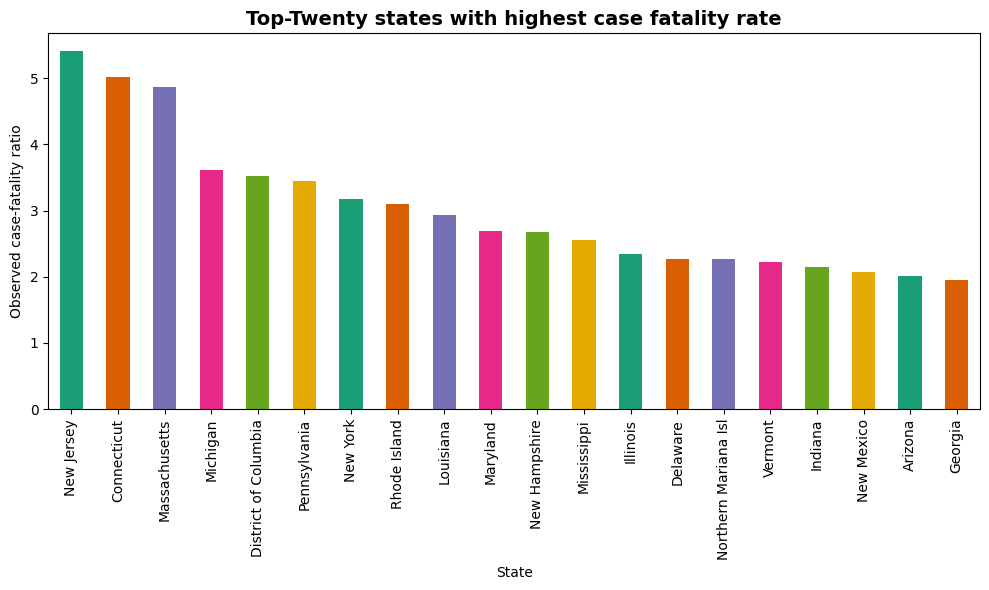

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
state_case.plot(kind='bar', x='State', y='case_fatality_ratio',ax=ax, legend=False, color = sns.palettes.mpl_palette('Dark2'))

# Customizing the plot
ax.set_title('Top-Twenty states with highest case fatality rate', fontsize=14, fontweight='bold')
ax.set_xlabel('State')
ax.set_ylabel('Observed case-fatality ratio')
ax.set_xticklabels(state_case['State'])

plt.tight_layout()
plt.show()

In [24]:
county_case = (
    df.groupby('county')
    .agg(cases_total=('cases', 'sum'), deaths_total=('deaths', 'sum'))
    .assign(case_fatality_ratio=lambda df: df['deaths_total'] / df['cases_total'] * 100)
    .sort_values(by='case_fatality_ratio', ascending=False)
    .head(20).reset_index()
)

#print(state_case_fatality_top20.columns)
print(county_case)

                  county  cases_total  deaths_total  case_fatality_ratio
0                 Kenedy         3108         357.0            11.486486
1                  Waldo        53251        4615.0             8.666504
2           Throckmorton         5902         507.0             8.590308
3                Terrell       122283        9670.0             7.907886
4           Emporia city        78984        6088.0             7.707890
5              Petroleum         1096          84.0             7.664234
6                 Catron         6663         460.0             6.903797
7                Norfolk      4873939      326499.0             6.698873
8                Jenkins       109234        7125.0             6.522694
9                 Bergen      9517855      618764.0             6.501087
10                Morris      3951861      253069.0             6.403793
11                 Early       164418       10492.0             6.381296
12              Hartford      7340579      459865.0

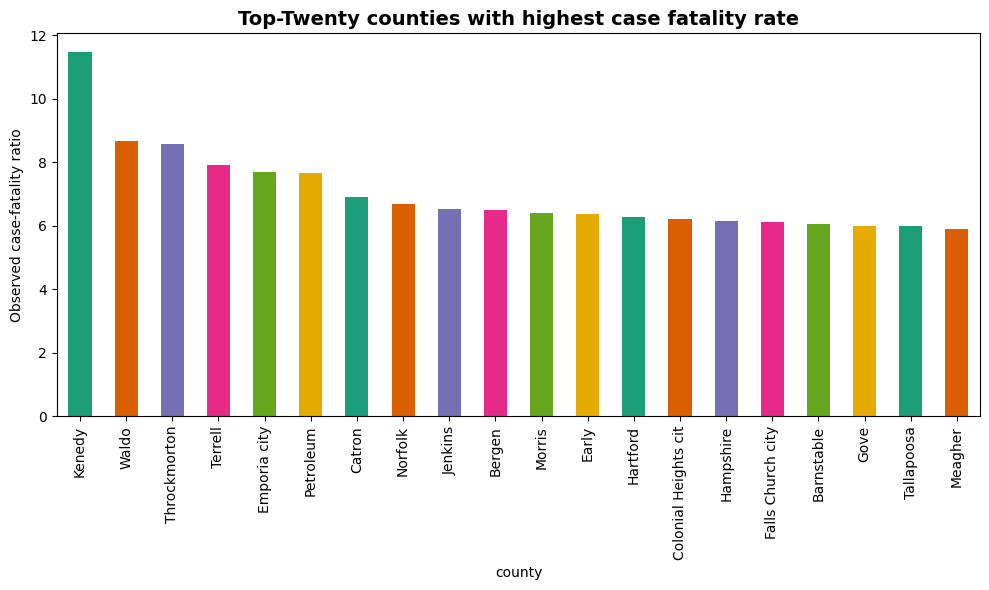

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
county_case.plot(kind='bar', x='county', y='case_fatality_ratio',ax=ax, legend=False,color = sns.palettes.mpl_palette('Dark2'))
# Customizing the plot
ax.set_title('Top-Twenty counties with highest case fatality rate', fontsize=14, fontweight='bold')
ax.set_xlabel('county')
ax.set_ylabel('Observed case-fatality ratio')
ax.set_xticklabels(county_case['county'])


# Display the plot
plt.tight_layout()
plt.show()